# Эмбединги и методы кластеризации текстов  
  
Мы научились уменьшать размерность пространства, чтобы визуализировать наши данные и упрощать их обработку и кластеризацию. Нам предстоит построить рекомендательную систему и для этого нужно научиться переводить тексты в числовое представление. Есть несколько методов word embedding.   
  
* **One Hot Encoding (OHE)**. Составляем словарь из наших текстов. Берем вектор с длиной словаря и ставим единицу в позиции, соответствующей номеру слова в словаре. Не обладает свойствами семантической близости слов.  
* **Bag of Words (BoW)**. Возьмем OHE вектор каждого слова в тексте и сложим вместе. На выходе получим подсчет количества различных слов в тексте в одном векторе. В таком случае теряем информацию о порядке слов, можем сравнивать близость текстов (например, косинусной мерой).  
* **TFIDF (term frequency — inverse document frequency)**. Представим наш корпус (набор текстов) в виде матрицы “слово-документ” (term-document). Эта матрица приводит нас к тематическим моделям, где матрицу “слово-документ” пытаются представить в виде произведения двух матриц “слово-тема” и “тема-документ”. В самом простом случае мы возьмем матрицу и с помощью SVD-разложения получим представление слов через темы и документов через темы: выводит на следующую модификацию матрицы term-document — формулу TF-IDF. TF — это частота слова  в тексте. IDF — это логарифм обратной частоты распространенности слова в корпусе. Распространенностью называется отношение числа текстов, в которых встретилось искомое слово, к общему числу текстов в корпусе. С помощью TF-IDF тексты можно сравнивать.  
* **Word2Vec**. **CBOW (continuous bag of words)**. Будем предсказывать вероятность слова по его окружению (контексту). То есть мы будем учить такие вектора слов, чтобы вероятность, присваиваемая моделью слову была близка к вероятности встретить это слово в этом окружении в реальном тексте. Важно выбрать какой функцией мы считает вероятность слова/расстояния между словами.Процесс тренировки устроен следующим образом: мы берем последовательно (2k+1) слов, слово в центре является тем словом, которое должно быть предсказано. А окружающие слова являются контекстом длины по k с каждой стороны. Каждому слову в нашей модели сопоставлен уникальный вектор, который мы меняем в процессе обучения нашей модели.  **Skip-gram**. Попытаемся из данного нам слова угадать его контекст (точнее вектор контекста). В остальном модель не претерпевает изменений.   
* **Doc2Vec**. Этот метод почти идентичен методу Word2Vec, за исключением того, что он является более общим, благодаря добавленным векторам абзаца и документа. Представляет собой два метода: distributed memory (DM, распределенная память) и distributed bag of words (DBOW, распределенный мешок слов). Метод DM прогнозирует слово по известным предшествующим словам и вектору абзаца. Несмотря на то, что контекст перемещается по тексту, вектор абзаца не перемещается (отсюда название «распределенная память») и позволяет учесть порядок слов. DBOW прогнозирует случайные группы слов в абзаце только на основании вектора абзаца  
* **FastText** библиотека, содержащая предобученные готовые векторные представления слов и классификатор, то есть алгоритм машинного обучения разбивающий слова на классы. Для получения векторного представления слов одновременно используются модели skipgram и CBOW. Более быстрая работа по сравнению с другими пакетами и моделями. Для модели векторных представлений слов используется skip-gram с негативным сэмплированием. Негативное сэмплирование — это способ создать для обучения векторной модели отрицательные примеры, то есть показать ей пары слов, которые не являются соседями по контексту. Для каждого положительного примера (когда слова в тексте стоят рядом, например, «пушистый котик») мы подбираем несколько отрицательных («пушистый утюг», «пушистый радиосигнал», «пушистое бегство»). Всего подбирается от 3 до 20 случайных слов. Такой случайный подбор нескольких примеров не требует много компьютерного времени и позволяет ускорить работу FastText.  
  
OHE, BoW считаются примитивными и чаще всего используется Word2Vec и прочие эмбединги. TFIDF мы по сути разбирали в тетрадке про SVD, поэтому остановимся на последних трех.

Источник:  
[Чудесный мир Word Embeddings](https://habr.com/ru/company/ods/blog/329410/)  
[Gensim library for word embeding](https://radimrehurek.com/gensim/)  
[Gensim Word2Vec Tutorial](https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial)  
[Word2vec и Doc2vec](http://datareview.info/article/sovremennyie-metodyi-analiza-tonalnosti-teksta/)  
[Как работает FastText и где ее применять](https://sysblok.ru/nlp/kak-rabotaet-fasttext-i-gde-ee-primenjat/#:~:text=FastText%20%E2%80%94%20%D1%8D%D1%82%D0%BE%20%D0%B1%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0%2C%20%D1%81%D0%BE%D0%B4%D0%B5%D1%80%D0%B6%D0%B0%D1%89%D0%B0%D1%8F%20%D0%BF%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5,%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%20%D1%80%D0%B0%D0%B7%D0%B1%D0%B8%D0%B2%D0%B0%D1%8E%D1%89%D0%B8%D0%B9%20%D1%81%D0%BB%D0%BE%D0%B2%D0%B0%20%D0%BD%D0%B0%20%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D1%8B.&text=%D0%94%D0%BB%D1%8F%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%20%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D1%85%20%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9%20%D1%81%D0%BB%D0%BE%D0%B2%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D0%B5%D1%82%D1%81%D1%8F%20skip%2Dgram%20%D1%81%20%D0%BD%D0%B5%D0%B3%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%BC%20%D1%81%D1%8D%D0%BC%D0%BF%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC.)  
[DOC2VEC gensim tutorial](https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5)  
[Python for NLP: Working with Facebook FastText Library](https://stackabuse.com/python-for-nlp-working-with-facebook-fasttext-library/)  
### Word2Vec

In [ ]:
# conda install -c conda-forge gensim
# conda install -c conda-forge spacy

In [1]:
import re
import pandas as pd
from time import time
from collections import defaultdict
import spacy
# from gensim.models.phrases import Phrases, Phraser

In [10]:
df = pd.read_csv('simpsons_dataset.csv')
df = df.dropna().reset_index(drop=True)
print(f'Размер данных {df.shape}')
df.head()

Размер данных (131853, 2)


,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...


Очистим данные от переносов строк, цифр и символов, не относящихся к алфавиту.

In [11]:
# !python -m spacy download en_core_web_sm

In [2]:
nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['spoken_words'])
txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000)]

df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
(f'Размер очищенных данных {df_clean.shape}')

sent = [row.split() for row in df_clean['clean']]
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[sent]

In [ ]:
import multiprocessing
from gensim.models import Word2Vec

cores = multiprocessing.cpu_count()
w2v_sg = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1,
                     sg=0) # sg=0 means we use cbow model, sg=1 means Skip_gram

w2v_cbow = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1,
                     sg=1) # sg=0 means we use cbow model, sg=1 means Skip_gram

In [ ]:
w2v_sg.build_vocab(sentences, progress_per=10000)
w2v_cbow.build_vocab(sentences, progress_per=10000)

In [ ]:
w2v_sg.train(sentences, total_examples=w2v_sg.corpus_count, epochs=30, report_delay=1)
w2v_cbow.train(sentences, total_examples=w2v_cbow.corpus_count, epochs=30, report_delay=1)

(5986338, 15708750)

In [ ]:
w2v_sg.init_sims(replace=True)
w2v_cbow.init_sims(replace=True)

У нас нет таргета, но нам нужно как-то оценить качество модели или хотя бы проанализировать его. Мы попросим нашу модель найти слово, наиболее похожее на некоторые из самых знаковых персонажей "Симпсонов".  
Заметим, что набор данных - это диалоги Симпсонов; поэтому, когда мы смотрим на наиболее похожие слова из "Гомера", мы не обязательно получаем членов его семьи, черты личности или даже его самые цитируемые слова. Нет, мы получаем то, что другие персонажи (поскольку Гомер не часто обращается к себе в 3-м лице) сказали вместе с "гомером", например, как он себя чувствует или выглядит ("подавлен"), где он находится ("гамак") или с кем ("мардж").

In [ ]:
w2v_sg.wv.most_similar(positive=["homer"])

[('marge', 0.7897032499313354),
 ('sweetheart', 0.7878544926643372),
 ('snuggle', 0.7530336380004883),
 ('depressed', 0.7518095970153809),
 ('crummy', 0.7500313520431519),
 ('bongo', 0.7495784759521484),
 ('good_friend', 0.7453687787055969),
 ('adopt', 0.7375249862670898),
 ('rude', 0.7367009520530701),
 ('gee', 0.7349343299865723)]

In [ ]:
w2v_cbow.wv.most_similar(positive=["homer"])

[('marge', 0.6521217823028564),
 ('shoulda', 0.5821740627288818),
 ('hey', 0.5758224725723267),
 ('know', 0.5739892721176147),
 ('gee', 0.5664465427398682),
 ('ask', 0.5626789331436157),
 ('refund', 0.562385082244873),
 ('good_friend', 0.5604056119918823),
 ('patty_selma', 0.560271680355072),
 ('simpson', 0.5601687431335449)]

Также можем понять, насколько близки два слова

In [ ]:
print(f'Похожесть слов по skip-gram: {w2v_sg.wv.similarity("moe", "tavern")}')
print(f'Похожесть слов по cbow: {w2v_cbow.wv.similarity("moe", "tavern")}')

Похожесть слов по skip-gram: 0.8951216340065002
Похожесть слов по cbow: 0.7315757274627686


Уменьшим размерность знакомым нам PCA и TSNE и посмотрим как располагаются слова друг относительно друга. Можно ли проследить на графике какую-то связь между ними? (Спойлер: можно)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
def tsnescatterplot(model, word, list_names, s=300):
    arrays = np.empty((0, s), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA().fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

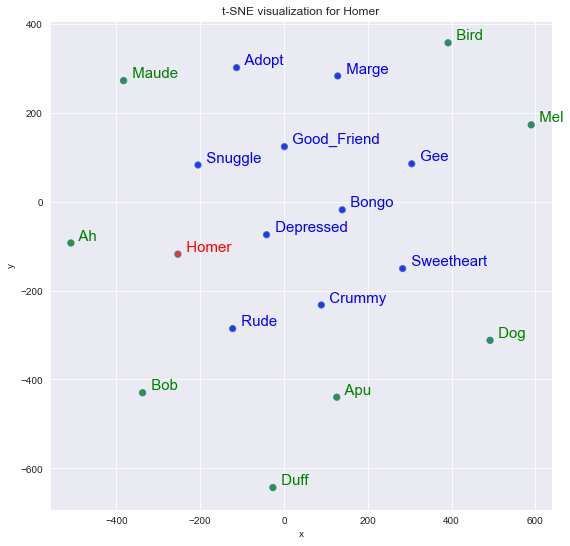

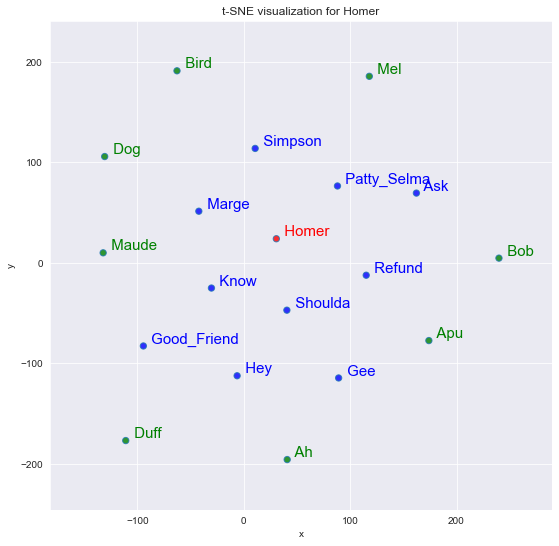

In [ ]:
tsnescatterplot(w2v_sg, 'homer', ['dog', 'bird', 'ah', 'maude', 'bob', 'mel', 'apu', 'duff'])
tsnescatterplot(w2v_cbow, 'homer', ['dog', 'bird', 'ah', 'maude', 'bob', 'mel', 'apu', 'duff'])

В обеих моделях рандомные слова располагаются дальше тех, которые модели предсказали, как семантически близкие. Однако, на первый взгляд, CBoW сработал лучше.  
Изобразим теперь наиболее близкие слова и наиболее далекие. Спойлер: опять модель отлично их разделила

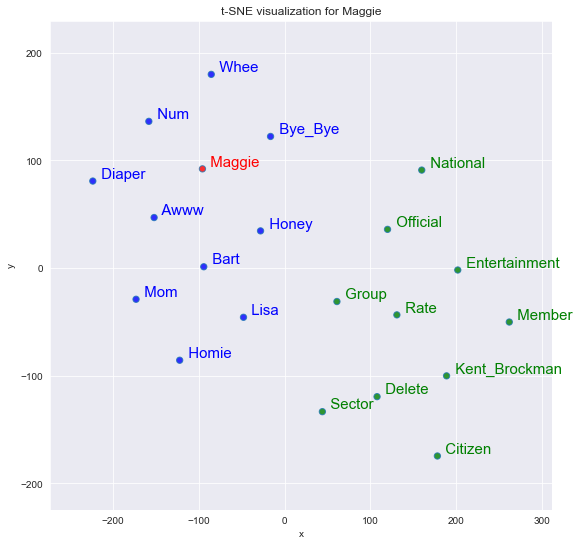

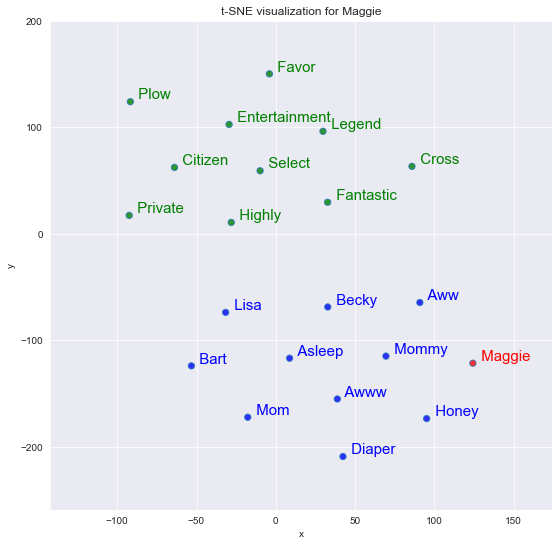

In [ ]:
tsnescatterplot(w2v_cbow, 'maggie', [i[0] for i in w2v_sg.wv.most_similar(negative=["maggie"])])
tsnescatterplot(w2v_sg, 'maggie', [i[0] for i in w2v_cbow.wv.most_similar(negative=["maggie"])])

Word2Vec хорош, когда нам не сильно важен порядок слов и данные представляют собой немного коротких предложений, как в случае со сценарием мультфильма. Для более сложных текстов, где нам важен порядок слов или их контекстуальное значение лучше использовать Doc2Vec модель.
### Doc2Vec  
Doc2Vec более сложная модель и применяется для объемных текстов, а не единоличных предложений, так как учитывает еще и контекст абзаца. Работает он, соответственно, дольше и сложнее. По сути своей они похожи с Word2Vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import pandas as pd

# text = pd.read_csv('IMDB.csv')
text = pd.read_csv('simpsons_dataset.csv')
text = df.dropna().reset_index(drop=True)

def cleanText(corpus):
    punctuation = """.,?!:;(){}[]"""
    corpus = [z.lower().replace('\n','') for z in corpus]
    corpus = [z.replace('<br />', ' ') for z in corpus]
    for c in punctuation:
        corpus = [z.replace(c, ' %s '%c) for z in corpus]
    return corpus

# data = cleanText(text['review'].to_numpy()[:100000])
data = cleanText(text['spoken_words'].to_numpy()[:100000])
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

Теперь создадим нашу модель и обучим ее несколькими эпохами. Заметим, что данных гораздо больше по объему, чем для word2vec и учитывается бОльший контекст, поэтому нам понадобиться больше времени на обучение.

In [ ]:
max_epochs = 30
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)

model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
model = Doc2Vec.load("d2v.model")

C:\Users\evaqw\anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


<ipython-input-195-c4a33242ca9f>:17: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  epochs=model.iter)


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29


In [ ]:
# to find most similar doc using tags
tag = 10010
print(f'Tag предложения: {tag}')
print('Предложение: ', data[tag])
print()

similar_doc = model.docvecs.most_similar(tag)
sim_tag=similar_doc[0][0]
print('Tag\'и наиболее близих предложений:', data[int(sim_tag)])

Tag предложения: 10010
Предложение:  oh homer ,  quit pouting . 

Tag'и наиболее близих предложений: dad ,  you're eating dr .  phil ! 


Пока нам это ни о чем не говорит, поэтому постараемся как-то визуализировать полученные результаты:

In [ ]:
print(f'Наиболее близкие слова для \'homer\':')
model.wv.most_similar(positive=["homer"])

Наиболее близкие слова для 'homer':


[('folks', 0.9248711466789246),
 ('marge', 0.9209271669387817),
 ('bart', 0.8997327089309692),
 ('dad', 0.8975593447685242),
 ('homie', 0.8723788857460022),
 ('guys', 0.8694172501564026),
 ('lisa', 0.8628809452056885),
 ('women', 0.8624093532562256),
 ('edna', 0.8490225672721863),
 ('parents', 0.8461600542068481)]

Как-будто бы модель doc2vec выцепляет больше информации о том, кто такой homer, чем о том, какие слова находятся с его именем в предложении.

In [ ]:
print(f'Похожесть слов: {model.wv.similarity("moe", "tavern")}')

Похожесть слов по skip-gram: -0.06964103132486343


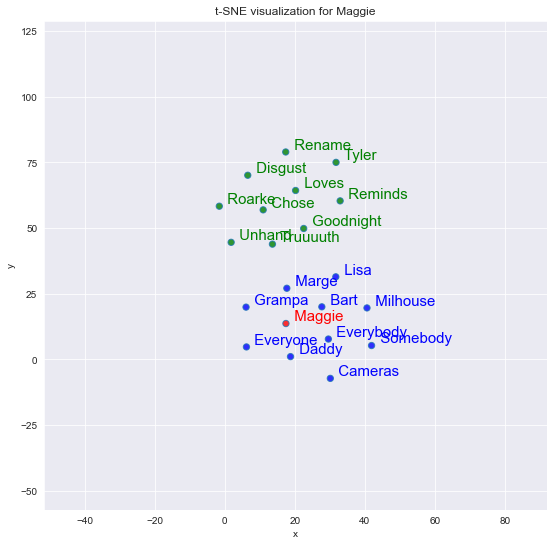

In [ ]:
tsnescatterplot(model, 'maggie', [i[0] for i in model.wv.most_similar(negative=["maggie"])], 20)

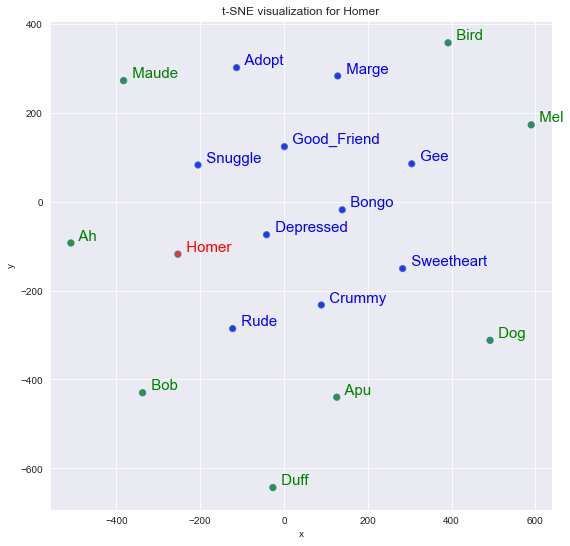

In [ ]:
# tsnescatterplot(w2v_sg, 'homer', ['dog', 'bird', 'ah', 'maude', 'bob', 'mel', 'apu', 'duff'])
tsnescatterplot(model, 'homer', ['dog', 'bird', 'ah', 'maude', 'bob', 'mel', 'apu', 'duff'])


### FastText  
FastText можно использовать для эмбеддинга и для классификации. Начнем с первого на базе топиков из Википедии.

In [51]:
# pip install wikipedia

In [3]:
# from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

import wikipedia
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Обработаем текст - избавимся от лишних символов, уберем пунктуацию и прочее

In [11]:
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [64]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2
ft_model = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

Посмотрим, какие слова ближайшие для 'homer'

In [66]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in ['artificial', 'intelligence', 'machine', 'network', 'recurrent', 'deep']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

artificial:['intelligence', 'moral', 'simulated', 'creating', 'machine']
intelligence:['artificial', 'intelligent', 'creating', 'human', 'general']
machine:['ethic', 'ability', 'argument', 'artificial', 'concerned']
network:['neural', 'recurrent', 'convolutional', 'approximation', 'universal']
recurrent:['supervised', 'convolutional', 'unsupervised', 'board', 'network']
deep:['learning', 'speech', 'scale', 'generative', 'specifically']


In [67]:
print(f'Схожесть слов artificial  и intelligence: {ft_model.wv.similarity("artificial ", "intelligence")}')

Схожесть слов artificial  и intelligence: 0.6944146156311035


Чтобы выбрать модель нужно понимать, какие данные нам будут подаваться на вход. Из чего состоят обычно описания площадок, квартир или каких-то мест. Из прилагательных, описывающих окружение, цвета и эмоции; из существительных, отвечающих за мебель, описание места, освещения; конкретно в нашей задаче, возможно, из слов, описывающих технические составляющие съемок - положение камер, техническое оснащение, количество света и прочее.  
TFIDF и SVD разложение для его клстеризации меня совсем не впечатлило. Doc2vec кажется должен хорошо справляться с большим текстом и улавливать контекстуальные значения слов, соотнося существительные между собой. Это можно заметить по визуализации Doc2Vec - даже в простых диалогах он выявил связь между семейными отношениями героев и их ролями (Гомер - родитель - Мардж - Лиза). Я бы выбрала именно Doc2Vec, несмотря на его сложность реализаци.  
Что можно сказать про FastText. Во-первых, конечно, к каждому алгоритму сложно подобрать гиперпараметры - кол-во эпох обучения, размер окна, размер эмбеддинга. Для предложенных параметров из статьи FastText неплохо обучился на статьях из Википедии, но обучения на диалогах из Симпсонов мне дождаться не удалось. Пока что могу сделать вывод, что это наиболее современная модель для эмбеддинга, которая к тому же может классифицировать данные, но она тяжело обучается. Можно дать ей шанс, когда подберемся к нашим данным и поймем, как настроить лучше гиперпараметры